# Movie Classifier Project Part 3: Perform linear regression algorithm

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# Plots
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocessing and modeling
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuring matplotlib 
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import warnings

### Loading our dataset and getting some background

This time we loud our dataset, and from it we create a new dataframe with columns Budget and Revenue

In [2]:
movies_budget = pd.read_csv(r'C:\Users\alana\Documents\TecMTY\8vo_semestre\Data_Science\movie_project\datasets\movie_DB3_clean.csv', index_col='Title')
movies_budget = movies_budget[['Budget', 'Revenue']]
movies_budget.head()

,Budget,Revenue
Title,,
A quiet place,17.0,340.939361
A quiet place Part II,55.0,297.400000
Aladin (2019),183.0,1050.693953
Alice in Wonderland,205.0,1028.467110
American Psycho,7.0,34.300000


In [3]:
# Getting an overall background
movies_budget.describe()

,Budget,Revenue
count,167.000000,167.000000
mean,91.943078,469.075315
std,69.063796,359.675748
min,0.636000,0.621392
25%,25.000000,188.160956
50%,85.000000,383.200000
75%,150.000000,701.750000
max,291.000000,1516.045911


### Graphical analysis

First of all, we plot the data in order to see if there is a relation between the variables and calculate correlation coefficients.

Text(0.5, 1.0, 'Box office revenue vs Budget')

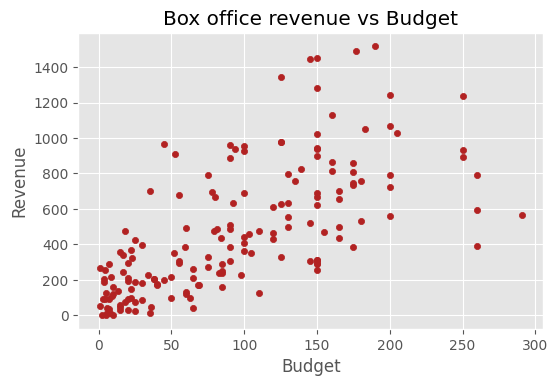

In [4]:
# Perform scatter plot
fig, ax = plt.subplots(figsize = (6, 3.84))

movies_budget.plot(
    x = 'Budget',
    y = 'Revenue',
    c = 'firebrick',
    kind = "scatter",
    ax = ax
)

ax.set_title('Box office revenue vs Budget')

In [5]:
# Linear correlation
corr_test = pearsonr(x = movies_budget['Budget'], y = movies_budget['Revenue'])
print("Pearson correlation coefficient: ", corr_test[0])
print("P-value: ", corr_test[1])

Pearson correlation coefficient:  0.6811903867597054
P-value:  4.083688095411766e-24


## Model fitting 

We will fit a linear regression model with `Revenue` as the response variable, and `Budget` as the predictor. To this end, we will split the data into two groups, a training set and a test set.

With this in mind, we proceed to use **Statsmodel** library. It provides two ways for training the model:

1) Giving a formula for the model and feeding it with a `DataFrame` for the training test that includes the response variable and the predictors. This is similar to the method used in **R**.

2) Giving two matrices, a predictor matrix and a response matrix.

In [6]:
# Train-test splitting
# ==============================================================================
X = movies_budget[['Budget']]
y = movies_budget['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 512,
                                        shuffle      = True
                                    )

In [7]:
# Model fitting using a formula
# ==============================================================================
movies_budget_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Budget', 'Revenue'])
modelf = smf.ols(formula = 'Revenue ~ Budget', data = movies_budget_train)
modelf = modelf.fit()
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.48e-19
Time:                        13:14:24   Log-Likelihood:                -928.34
No. Observations:                 133   AIC:                             1861.
Df Residuals:                     131   BIC:                             1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.6702     37.418      4.401      0.000      90.649     238.691
Budget         3.4558      0.323     10.687      0.000       2.816       4.095
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.657
Skew:                           0.719   Prob(JB):                     0.000398
Kurtosis:                       3.869   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that R^2 is small, so we suspect that the intercept must be zero

In [8]:
movies_budget_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Budget', 'Revenue'])
modelf_noint = smf.ols(formula = 'Revenue ~ Budget + 0', data = movies_budget_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Revenue   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              478.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    9.57e-46
Time:                        13:24:45   Log-Likelihood:                         -937.51
No. Observations:                 133   AIC:                                      1877.
Df Residuals:                     132   BIC:                                      1880.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Budget         4.5863      0.210     21.882      0.000       4.172       5.001
==============================================================================
Omnibus:                        5.366   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                7.620
Skew:                           0.104   Prob(JB):                       0.0221
Kurtosis:                       4.154   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modeling fitting using matrices

For this we'll have two situations:

1) With intercept

In [9]:
# Model fitting using matrices
# ==============================================================================
# Add a column of 1s to the predictor matrix
X_train_int = sm.add_constant(X_train, prepend=True)
modelm = sm.OLS(endog=y_train, exog=X_train_int,)
modelm = modelm.fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.48e-19
Time:                        13:26:32   Log-Likelihood:                -928.34
No. Observations:                 133   AIC:                             1861.
Df Residuals:                     131   BIC:                             1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.6702     37.418      4.401      0.000      90.649     238.691
x1             3.4558      0.323     10.687      0.000       2.816       4.095
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.657
Skew:                           0.719   Prob(JB):                     0.000398
Kurtosis:                       3.869   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Without intercept

In [10]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              478.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                    9.57e-46
Time:                        13:28:02   Log-Likelihood:                         -937.51
No. Observations:                 133   AIC:                                      1877.
Df Residuals:                     132   BIC:                                      1880.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.5863      0.210     21.882      0.000       4.172       5.001
==============================================================================
Omnibus:                        5.366   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                7.620
Skew:                           0.104   Prob(JB):                       0.0221
Kurtosis:                       4.154   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Confidence intervals for the coefficients

In [11]:
# Confidence intervals for the coefficients
# ==============================================================================
modelm_noint.conf_int(alpha=0.05)

array([[4.17173022, 5.00093892]])